YAPAY ZEKA dersi için bu bölümde;

"Scikit-Learn" kütüphanesi:

"Tensorflow" kütüphanesi:

"Pytorch" kütüphanesi:

"Keras" kütüphanesi kullanım ve örnekleri uygulanmıştır

In [1]:
print("Merhaba, İGÜ - YAPAY ZEKA geliştirilmesi için kullanılacak kütüphaneler - D4") # print ekrana çıktı veren bir koddur.
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)
from google.colab import drive # google colab - drive bağlantısı
drive.mount('/content/drive')
import os

os.chdir('/content/drive/My Drive/YapayZeka')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

Merhaba, İGÜ - YAPAY ZEKA geliştirilmesi için kullanılacak kütüphaneler - D4
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Mounted at /content/drive
/content/drive/My Drive/YapayZeka


**Kütüphane Kurulumunda dikkat edilmesi gereken en önemli konu:**

Genel kullanım bakımından python kütüphanesi kurucağımız zaman dikkat edilmesi gereken iki yapı bulunmaktadır. Bu yapılar "pip" ve "pip3"'tür.

pip yapısı -> Python 2.x sürümlerini destekler.

pip3 yapısı -> Python 3.x sürümlerini destekler.

Bazı istatistiksel ingilizce kelimelerin bilinmesi ve hesaplanması gerekir.Bunlar:

* Mean Absolute Mean (MAE): Gerçek değerler ile tahmin edilen değerler arasındaki farkların mutlak değerler ortalamasıdır.

* Root Mean Squared Error (RMSE): MSE'nin karekökü ve tahminlerin ne kadar tutarlı olduğunu gösterir.

* Mean Absolute Percentage Error (MAPE): Gerçek değerler ile tahmin edilen değerler arasındaki farkın, gerçek değerin yüzdesel olarak ne kadar olduğunu gösterir.

* R-square(R^2) : Modelin hedef değişkeninin varyansını ne kadar iyi açıkladığını gösterir.

* Doğruluk(Accuracy): Modelin doğru sınıflandırdığı örneklerin , toplam örnek sayısına oranıdır.

* Kesinlik (Precision): Modelin pozitif tahminlerinin ne kadarının gerçekten pozitif olduğunu gösterir.

*Duyarlılık(Recall): Gerçek pozitif örneklerin ne kadarının modelin doğru bir şekilde tahmin edebildiğini gösterir.

*Karmaşıklık matrisi






In [ ]:
# Scikit-Learn kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması

!pip install -U scikit-learn


**1.Scikit-Learn kütüphanesi:**

* !pip install -U scikit-learn

İlk örneğimizde fetch_california_housing()veri setini Scikit-Learn Kütüphanesi içerisinden alarak ilk yapay zeka uygulaması gerçekleştirildi.

Bu veri setinin içeriğinde:

California'daki farklı konumlardaki ev fiyatlarının verileri ve bu fiyatları etkileyen çeşitli faktörler içerir.

"fetch_california_housing" veri setinin degişken tanımları->

MedInc: Ortalama hane geliri

HouseAge:Konutların ortalama yaşı

AveRooms: Ortalama yatak odası sayısı

AveOccup: Hane başına ortalam kişi sayısı

Latitude: Bölgenimn enlem bilgisi

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housing veri setini yükleme
veri_seti_bilgisi = fetch_california_housing()

# Özellikleri ve hedef değişkeni almak
X = veri_seti_bilgisi.data  # Bağımsız değişkenler (özellikler)
y = veri_seti_bilgisi.target  # Bağımlı değişken (fiyatlar)

# Verileri bir DataFrame'e dönüştürme
df = pd.DataFrame(X, columns=veri_seti_bilgisi.feature_names)
df['PRICE'] = y

# İlk birkaç satırı görüntüleme
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# California Housing veri setini yükleme
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Özellikler ve hedef değişkeni ayırma
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

# Model oluşturma
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
predictions = model.predict(X_test)
print("Tahmin Sonucları: ", predictions[:5])
print("Gerçek Değerler: ", y_test[:5].values)

# Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) Sonucu:", mse)

# Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²) Sonucu:", r2)

Tahmin Sonucları:  [1.60018158 2.29084462 2.6182369  0.20944944 1.23639749]
Gerçek Değerler:  [0.933 2.799 3.929 0.52  1.236]
Mean Squared Error (MSE) Sonucu: 0.5322170539831866
R-squared (R²) Sonucu: 0.5984024263886707


In [ ]:
# TensorFlow kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması

!pip install pydot
!apt-get install graphviz
!pip install tensorflow

# Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


2.TensorFlow kütüphanesi:

!pip install tensorflow

!pip install tensorflow-gpu

MNIST veri seti üzerinde yapay zeka işlemleri gerçekleştirilecek.

Veri seti Eğitim ->60000 ve Test ->10000 olmak üzere yazılım üzerinde bölmemiz gerekmektedir.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd

/content/drive/MyDrive/YapayZeka


Yapay zeka modeli oluşturmada aşamalar;

1.Modelin oluşturulması ->model=models.Sequential()

2.Flatten Katmanı->layers.Flatten(input_shape=(28,28))

Bu katman, 2 boyutlu (28*28) bir görüntüyü 1 boyutlu bir vektöre dönüştürür 28*28 =784 boyutlu bir vektördür.

3.Dense Katmanı->layers.Dense(128,activation='relu')

Bu katman,tam bağlı bir katmandır. Yani her bir norön, bir önceki katmandaki tüm nöronlarla bağlkantılıdır. Burada 128 nötron bulunmaktadır.
Aktivasyon Fonksiyonları:Relu, Sigmoid,Tanh, Leaky ReLU ve Softmaxdır.

4.Dropout Katmanı->layers.Dropout(0.2)

 Dropout: Bu katman,eğitim esnasında nöronların %20 sini rastgele devre dışı bırakır.

 5.Çıkış katmanı

 ->layers.Dense(10,activation='softmax')

 Dense katmanı: Bu katmand 10 nöron bulunur.

 Softmax fonksiyonu, giriş değerlerini olasılıklara çevirir. Her bir böronun çıkışı 0 ile 1 arasındas olacak şekilde normalize edilir ve tüm çıkışların toplamı 1 olur.


In [ ]:
model = models.Sequential([ # Modeli oluşturma
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelin eğitim süreci

1.model.compile()

2.optimizasyon algoritması

3.Kayıp

4.Başarı değerlerinin elde edilmesi (accuracy)

In [ ]:
model.compile(optimizer='adam', # Modeli derleme
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Modelin eğitim süreci**

5.model eğitim işlemi --> model.fit()

6.model eğitim işlemi --> model.fit(x_train, y_train, ...)

7.Eğitim Adım Sayısı --> epochs=5

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8601 - loss: 0.4786
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9560 - loss: 0.1495
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9664 - loss: 0.1089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9746 - loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9781 - loss: 0.0731


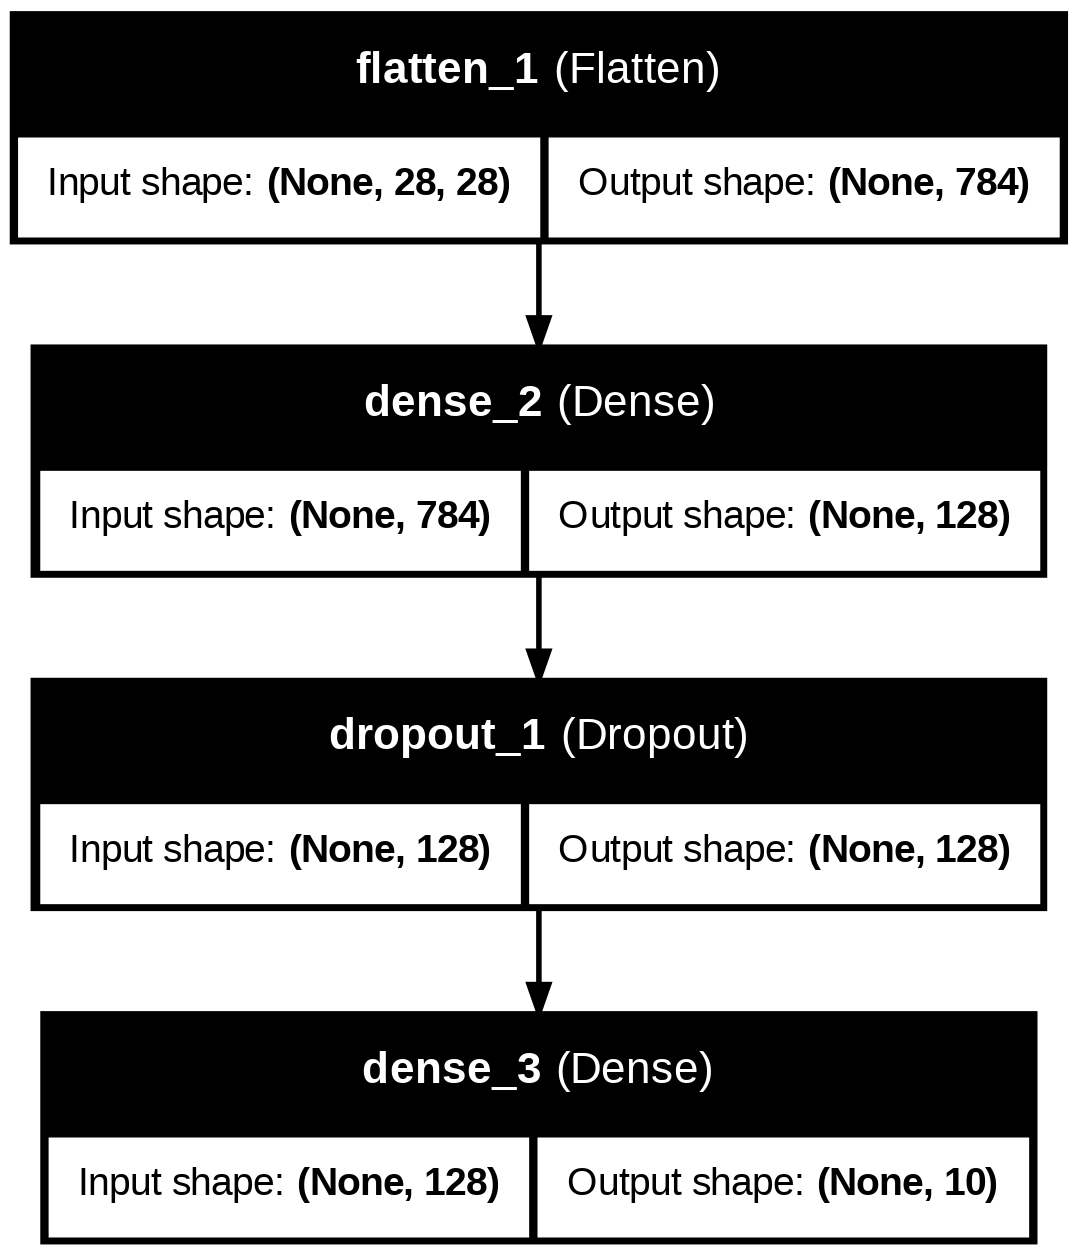

In [ ]:
model.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_Model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı


In [ ]:
# Test seti üzerinde modelin performansını değerlendirme

hata_oranı, basarı_oranı = model.evaluate(x_test, y_test, verbose=2)

print(" Modelin Doğruluk Oranı: %", basarı_oranı*100)
print(" Modelin Hata Oranı: %", hata_oranı*100)

313/313 - 1s - 2ms/step - accuracy: 0.9765 - loss: 0.0739
 Modelin Doğruluk Oranı: % 97.64999747276306
 Modelin Hata Oranı: % 7.3935434222221375


3.PyTorch Kütüphanesi:

* !pip install torchvision torchaudio

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 7.93MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.19MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 0.7562162283418784, Accuracy: 81.735%
Epoch 2, Loss: 0.36814302036058166, Accuracy: 89.41833333333334%
Epoch 3, Loss: 0.3237004309638477, Accuracy: 90.58833333333334%
Epoch 4, Loss: 0.2971160961732046, Accuracy: 91.45666666666666%
Epoch 5, Loss: 0.2765346087340607, Accuracy: 91.97666666666667%
Epoch 6, Loss: 0.25789316518823985, Accuracy: 92.6%
Epoch 7, Loss: 0.24143824989655252, Accuracy: 93.06166666666667%
Epoch 8, Loss: 0.22670532759032777, Accuracy: 93.535%
Epoch 9, Loss: 0.21261795088728228, Accuracy: 94.01166666666667%
Epoch 10, Loss: 0.20088312188302404, Accuracy: 94.32833333333333%
Epoch 11, Loss: 0.1897273812927544, Accuracy: 94.665%
Epoch 12, Loss: 0.17926658043014343, Accuracy: 94.90666666666667%
Epoch 13, Loss: 0.17037304105963916, Accuracy: 95.16333333333333%
Epoch 14, Loss: 0.1620886638792339, Accuracy: 95.425%
Epoch 15, Loss: 0.1543329127355298, Accuracy: 95.66333333333333%
Epoch 16

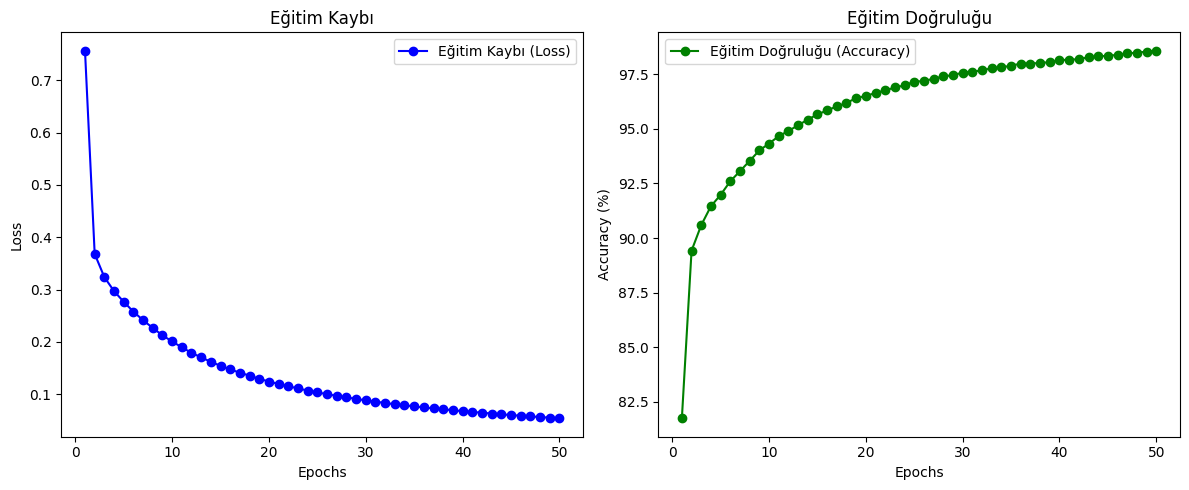

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Modeli oluşturma
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim için boş listeler tanımla
train_losses = []
train_accuracies = []

# Eğitme döngüsü
for epoch in range(50):  # 50 epoch boyunca eğit
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Kayıp (loss) değerini topla
        running_loss += loss.item()

        # Doğruluğu hesapla
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

print('Eğitim tamamlandı!')

# Eğitim sonuçlarını grafikle göster
epochs = range(1, 51)  # 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı (Loss)')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Eğitim Doğruluğu (Accuracy)')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Test verisi üzerinde modelin performansını değerlendirme
test_loss = 0.0
correct = 0
total = 0

# Test verisi üzerinde modelin kaybını ve doğruluğunu hesapla (gradyan hesaplama yok)
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss += loss.item()

        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Test seti kaybı ve doğruluğu
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print("Test Seti Kaybı: ", test_loss)
print("Test Seti Doğruluğu: ", test_accuracy , "%")

Test Seti Kaybı:  0.08030585174383537
Test Seti Doğruluğu:  97.51 %


**4. Keras kütüphanesi:**

!pip install keras